En este proyecto, tomaremos diversos datasets con el seguimiento diario del precio de las criptomonedas más importantes. Crearemos tres portafolios cripto según el riesgo: Conservador, Moderado y Agresivo.//

*In this project, we will take various datasets containing daily tracking of the prices of the most important cryptocurrencies. We will create three crypto portfolios based on risk: Conservative, Moderate, and Aggressive.*


# Carga de librerias. *Loading libraries.*

In [ ]:
!pip install fredapi > /dev/null

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import time

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

#Eliminamos los warings asi no nos molestan// We remove the warnings so they don't bother us.
import warnings
warnings.filterwarnings("ignore")


# Datasets de cryptos con Kaggle. *Cryptocurrency datasets on Kaggle.*

In [ ]:
dfBTC = pd.read_csv('BTC.csv')
dfETH = pd.read_csv('ETH.csv')
dfADA = pd.read_csv('ADA.csv')
dfBNB = pd.read_csv('BNB.csv')
dfALGO = pd.read_csv('ALGO.csv')
dfAVAX = pd.read_csv('AVAX.csv')
dfDOT = pd.read_csv ('DOT.csv')
dfMATIC = pd.read_csv ('MATIC.csv')
dfSOL = pd.read_csv ('SOL.csv')
dfTRX = pd.read_csv ('TRX.csv')
dfXRP = pd.read_csv ('XRP.csv')
dfXTZ = pd.read_csv ('XTZ.csv')

Incorporamos las criptomonedas deseadas a una lista:

*We incorporate the desired cryptocurrencies into a list.*

In [ ]:
#Dataframes:
dataframes = [dfBTC, dfETH, dfBNB, dfALGO, dfAVAX, dfADA, dfDOT, dfMATIC, dfTRX, dfXRP, dfSOL, dfXTZ]

In [ ]:
dfBTC.head()

,priceBTC
date,
2010-07-17,0.04951
2010-07-18,0.08584
2010-07-19,0.08080
2010-07-20,0.07474
2010-07-21,0.07921


In [ ]:
#convertimos las columnas object en tipo datetime y asignamos la fecha al index
# We convert the object columns to datetime type and assign the date to the index.
for frame in dataframes:
  frame['date'] = pd.to_datetime(frame['date'])
  frame.set_index('date', inplace = True)

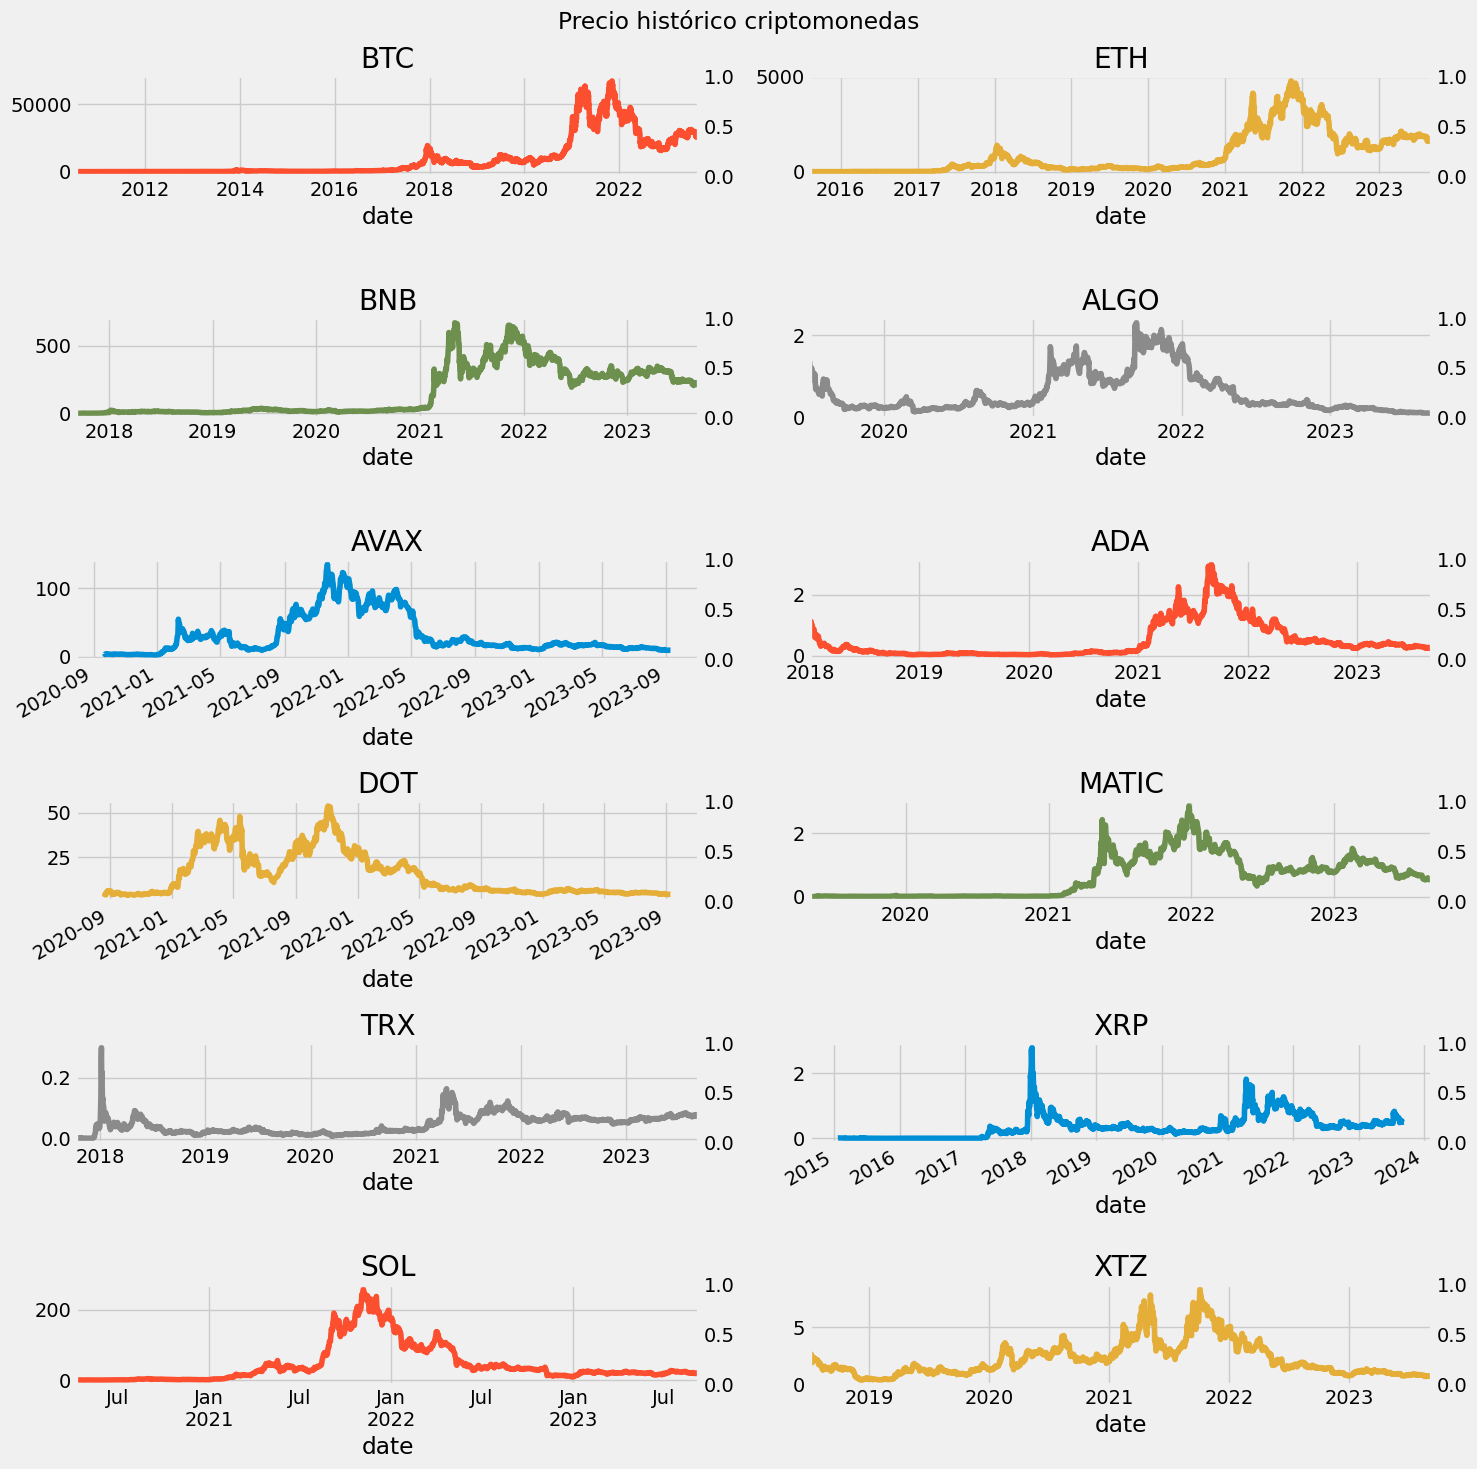

In [ ]:
#graficamos:
# We plot:
fig, axs = plt.subplots(6, 2, figsize=(15, 15))
axs = axs.flatten()

c = 1
i = 0
for frame in dataframes:
    ax2 = axs[i].twinx()
    frame['close'].plot(ax=axs[i], color = color_pal[c])
    ax2.grid(False)
    ax2.set_title(frame['ticker'].iloc[0])
    i += 1
    c = c + 1
    if c == 5:
      c = 0

fig.suptitle("Precio histórico criptomonedas/Historical cryptocurrency prices")
plt.tight_layout()
plt.show()

In [ ]:
#quitamos la fecha como index ya que solo la usamos para graficar:
#We remove the date as the index since we only used it for plotting.
for frame in dataframes:
  frame.reset_index(inplace=True)

# Creación de un DF unificado:

In [ ]:
#eliminamos las columnas que no nos interesan
# We remove the columns that are not of interest.

for frame in dataframes:
  frame.drop(['open', 'high', 'low'], axis=1, inplace=True)

In [ ]:
#cambiamos el nombre de las columnas:
# We change the column names:
for frame in dataframes:
  frame.rename(columns={'ticker':'crypto', 'close':'price'}, inplace=True)

In [ ]:
#vemos la fecha de inicio en cada dataset:
# We check the start date in each dataset:
for frame in dataframes:
    print(f'Crypto: {frame["crypto"].iloc[0]} Shape: {frame.shape} Fecha de inicio: {frame["date"].min()}')

Crypto: BTC Shape: (4803, 3) Fecha de inicio: 2010-07-17 00:00:00
Crypto: ETH Shape: (2956, 3) Fecha de inicio: 2015-08-07 00:00:00
Crypto: BNB Shape: (2193, 3) Fecha de inicio: 2017-09-08 00:00:00
Crypto: ALGO Shape: (1532, 3) Fecha de inicio: 2019-07-01 00:00:00
Crypto: AVAX Shape: (1082, 3) Fecha de inicio: 2020-09-22 00:00:00
Crypto: ADA Shape: (2080, 3) Fecha de inicio: 2017-12-30 00:00:00
Crypto: DOT Shape: (1112, 3) Fecha de inicio: 2020-08-21 00:00:00
Crypto: MATIC Shape: (1594, 3) Fecha de inicio: 2019-04-30 00:00:00
Crypto: TRX Shape: (2161, 3) Fecha de inicio: 2017-10-10 00:00:00
Crypto: XRP Shape: (3151, 3) Fecha de inicio: 2015-01-21 00:00:00
Crypto: SOL Shape: (1248, 3) Fecha de inicio: 2020-04-10 00:00:00
Crypto: XTZ Shape: (1893, 3) Fecha de inicio: 2018-07-05 00:00:00


In [ ]:
#asignamos la fecha al index
# We assign the date to the index.
for frame in dataframes:
  frame.set_index('date', inplace = True)

In [ ]:
#en cada df cambiamos el nombre de la columna 'price' por la de 'price + crypto':
# In each DataFrame, we change the name of the 'price' column to 'price + crypto':
for frame in dataframes:
    frame.rename(columns={'price': 'price' + frame["crypto"].iloc[0]}, inplace=True)
    del frame['crypto'] #eliminamos la columna con el nombre de la crypto


In [ ]:
#unificamos los dataframes
# We merge the DataFrames.
df = pd.concat(dataframes, axis=1, join='outer')

In [ ]:
df

,priceBTC,priceETH,priceBNB,priceALGO,priceAVAX,priceADA,priceDOT,priceMATIC,priceTRX,priceXRP,priceSOL,priceXTZ
date,,,,,,,,,,,,
2010-07-17,0.04951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-18,0.08584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-19,0.08080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-20,0.07474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-21,0.07921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-05,25722.40000,1629.48,214.195,0.093667,9.91124,0.256824,4.24212,0.557628,0.077262,0.504053,20.2642,0.694559
2023-09-06,25709.90000,1631.57,214.769,0.093411,9.93384,0.257373,4.24211,0.559170,0.078502,0.502393,19.6269,0.692777
2023-09-07,26146.70000,1645.46,216.789,0.096952,10.05900,0.257139,4.26912,0.554416,0.078920,0.504043,19.7939,0.698344


eliminamos las fechas en que no tenemos datos para todas las criptos:

*We remove the dates for which we don't have data for all cryptocurrencies.*

In [ ]:
df.shape

(4803, 12)

In [ ]:
df.dropna(inplace=True)
df.shape

(1077, 12)

# Fechas faltantes. *Missing dates.*

Este código creará un rango de fechas completo y luego utilizará el método `difference` para encontrar las fechas que no están en el índice del DataFrame. Las fechas faltantes se imprimirán en la salida.

*This code will create a complete date range and then use the `difference` method to find the dates that are not in the DataFrame's index. The missing dates will be printed in the output.*

In [ ]:
import pandas as pd

# Creamos un rango de fechas completo desde la fecha de inicio hasta la fecha de finalización esperada
# We create a complete date range from the start date to the expected end date.
fecha_inicio = '2020-09-22'
fecha_finalizacion = '2023-09-09'
rango_fechas_completo = pd.date_range(start=fecha_inicio, end=fecha_finalizacion)

# Obtenemos el índice del DataFrame
# Get the DataFrame index.
indice_dataframe = df.index

# Encontramos las fechas que están en el rango completo pero no están en el índice del DataFrame
# Find the dates that are not in the DataFrame's index.
fechas_faltantes = rango_fechas_completo.difference(indice_dataframe)

print("Fechas faltantes en el dataset:")
print(fechas_faltantes)


Fechas faltantes en el dataset:
DatetimeIndex(['2022-07-02', '2022-07-03', '2022-07-04', '2022-11-11',
               '2022-11-12', '2022-11-13'],
              dtype='datetime64[ns]', freq=None)


In [ ]:
rango_fechas_completo

DatetimeIndex(['2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
               '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29',
               '2020-09-30', '2020-10-01',
               ...
               '2023-08-31', '2023-09-01', '2023-09-02', '2023-09-03',
               '2023-09-04', '2023-09-05', '2023-09-06', '2023-09-07',
               '2023-09-08', '2023-09-09'],
              dtype='datetime64[ns]', length=1083, freq='D')

In [ ]:
# Crea un DataFrame con el índice igual al rango de fechas completo y valores nulos
# Create a DataFrame with the index equal to the complete date range and null values.
df_nuevo = pd.DataFrame(index=rango_fechas_completo)

# Combinamos el DataFrame nuevo con el DataFrame existente usando el índice nuevo
# Combine the new DataFrame with the existing DataFrame using the new index.
df = df_nuevo.join(df)

In [ ]:
#chequeamos la forma del df transformado
# Check the shape of the transformed DataFrame.
df.shape

(1083, 12)

como no nos interesa el dia a dia del precio sino una vision mas macro imputaremos los valores faltantes con una tecnica muy sencilla:

*Since we are not interested in the day-to-day price but rather a more macro view, we will impute the missing values using a very simple technique:*

In [ ]:
#con este metodo, tomamos el valor anterior y posterior al Nan y lo promediamos
# With this method, we take the previous and next values to the NaN and average them.
df = df.interpolate(method ='linear', limit_direction ='both')

In [ ]:
#chequeamos si quedaron datos faltantes despues de la imputación:
# Check if there are any missing data left after imputation:
df.isna().sum()

priceBTC      0
priceETH      0
priceBNB      0
priceALGO     0
priceAVAX     0
priceADA      0
priceDOT      0
priceMATIC    0
priceTRX      0
priceXRP      0
priceSOL      0
priceXTZ      0
dtype: int64

# Comparativa de fluctuaciones del precio con datos estandarizados (min-max)

*Comparison of price fluctuations with standardized (min-max) data.*

In [ ]:
from sklearn.preprocessing import MinMaxScaler

dfnorm = df.copy()

# Inicializamos el scaler y lo ajustamos a los datos
# Initialize the scaler and fit it to the data.
scaler = MinMaxScaler()
scaler.fit(dfnorm)

# Transformamos los datos y los convertirmos nuevamente en un DataFrame de Pandas
# Transform the data and convert it back into a Pandas DataFrame.
dfnorm = pd.DataFrame(scaler.transform(dfnorm), columns=dfnorm.columns, index=dfnorm.index)

# Graficamos los datos estandarizados
# Plot the standardized data.
fig = px.line(dfnorm, x=dfnorm.index, y=['priceBTC', 'priceETH', 'priceBNB', 'priceALGO', 'priceAVAX',
       'priceADA', 'priceDOT', 'priceMATIC', 'priceTRX', 'priceXRP',
       'priceSOL', 'priceXTZ'], title='Gráfico interactivo: Comparación de fluctuaciones de precio con datos Estandarizados')
fig.update_xaxes(
    title_text="Fecha",
    tickmode="auto",
    tickangle=45,
    showgrid=True,
)
fig.update_yaxes(title_text = 'valores estandarizados')
fig.show()

# Perfil conservador. *Conservative investment profile.*

Composición de la cartera: 50% BTC,
20% ETH,
20% ADA,
5% BNB,
5% XRP.

Portfolio composition: 50% BTC, 20% ETH, 20% ADA, 5% BNB, 5% XRP.

In [ ]:
#seleccionamos las columnas del etf1:
# We select the columns of ETF1:
ETF1 = df[['priceBTC',	'priceETH',	'priceBNB', 'priceADA', 'priceXRP']]

### Inversión n1. Entrada: Septiembre 2020. *Investment 1. Entry: September 2020.*




Tomando como inversión modelo 1000 usd, calcularemos el retorno:

*Using $1,000 USD as the model investment, we will calculate the return.*


In [ ]:
# Definimos los porcentajes de inversión en un diccionario:
# We define the investment percentages in a dictionary:
percentages = {
    'BTC': 0.50,
    'ETH': 0.20,
    'ADA': 0.20,
    'BNB': 0.05,
    'XRP': 0.05
}

# Copiamos el DataFrame original para mantenerlo intacto
# We copy the original DataFrame to keep it intact.
df_inversion = ETF1.copy()

# Calculamos el valor de la inversión en cada criptomoneda para cada día
# We calculate the investment value in each cryptocurrency for each day.
for cripto, pct in percentages.items():
    col_name = f"Inversion_{cripto}"
    df_inversion.loc[:, col_name] = df_inversion['price' + cripto] / df_inversion['price' + cripto][0] * pct * 1000

# Calculamos el valor total de la inversión diaria
# We calculate the total daily investment value.
df_inversion['Valor_Total_PConservador'] = df_inversion[[f"Inversion_{cripto}" for cripto in percentages.keys()]].sum(axis=1)

#establecemos la modificación en el df original:
# We set the modification in the original DataFrame:
ETF1_1 = df_inversion

ETF1_1

,priceBTC,priceETH,priceBNB,priceADA,priceXRP,Inversion_BTC,Inversion_ETH,Inversion_ADA,Inversion_BNB,Inversion_XRP,Valor_Total_PConservador
2020-09-22,10551.0,346.52,24.130,0.082210,0.234300,500.000000,200.000000,200.000000,50.000000,50.000000,1000.000000
2020-09-23,10260.0,322.90,23.100,0.077440,0.224600,486.209838,186.367309,188.395572,47.865727,47.930004,956.768451
2020-09-24,10651.6,346.05,24.150,0.083050,0.232400,504.767321,199.728731,202.043547,50.041442,49.594537,1006.175578
2020-09-25,10752.9,357.35,24.830,0.097510,0.244100,509.567813,206.250721,237.221749,51.450477,52.091336,1056.582097
2020-09-26,10730.6,353.19,26.330,0.094730,0.241600,508.511042,203.849706,230.458582,54.558641,51.557832,1048.935801
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-05,25722.4,1629.48,214.195,0.256824,0.504053,1218.955549,940.482512,624.799903,443.835475,107.565728,3335.639166
2023-09-06,25709.9,1631.57,214.769,0.257373,0.502393,1218.363188,941.688791,626.135507,445.024865,107.211481,3338.423833
2023-09-07,26146.7,1645.46,216.789,0.257139,0.504043,1239.062648,949.705645,625.566233,449.210526,107.563594,3371.108646
2023-09-08,25890.6,1634.22,214.270,0.253105,0.504429,1226.926358,943.218285,615.752342,443.990883,107.645967,3337.533833


### Visualización Rendimiento. Perfil conservador.

*Performance Visualization. Conservative Profile.*

In [ ]:
fig = px.line(ETF1_1, x = ETF1_1.index, y = ['Inversion_BTC','Inversion_ETH','Inversion_ADA', 'Inversion_BNB',
       'Inversion_XRP','Valor_Total_PConservador'], title='Perfil Conservador. Rendimiento total + rendimiento por cripto')
# Personaliza el formato del eje x para mostrar las fechas correctamente
# Customize the format of the x-axis to display dates correctly.
fig.update_xaxes(
    title_text="Fecha",
    tickformat="%Y-%m-%d",
    tickmode="auto",
    tickangle=45,
    showgrid=True,
)
fig.update_yaxes(title_text = 'USD')
fig.show()

Ahora compararemos diversas fechas de entrada para esta misma inversión:

2- Inversión comenzada en Enero 2021

3- Inversión comenzada en Julio 2021

4- Inversión comenzada en Enero 2022

5- Inversión comenzada en Julio 2022

*Now, we will compare different entry dates for the same investment:*

*2- Investment started in January 2021.*

*3- Investment started in July 2021.*

*4- Investment started in January 2022.*

*5- Investment started in July 2022. *

### Perfil conservador. Calculando rendimientos con entradas en distintas fechas

*Conservative profile. Calculating returns with investments starting on different dates.*

In [ ]:
Entradas = ['2021-01-01','2021-07-01', '2022-01-01','2022-07-01']

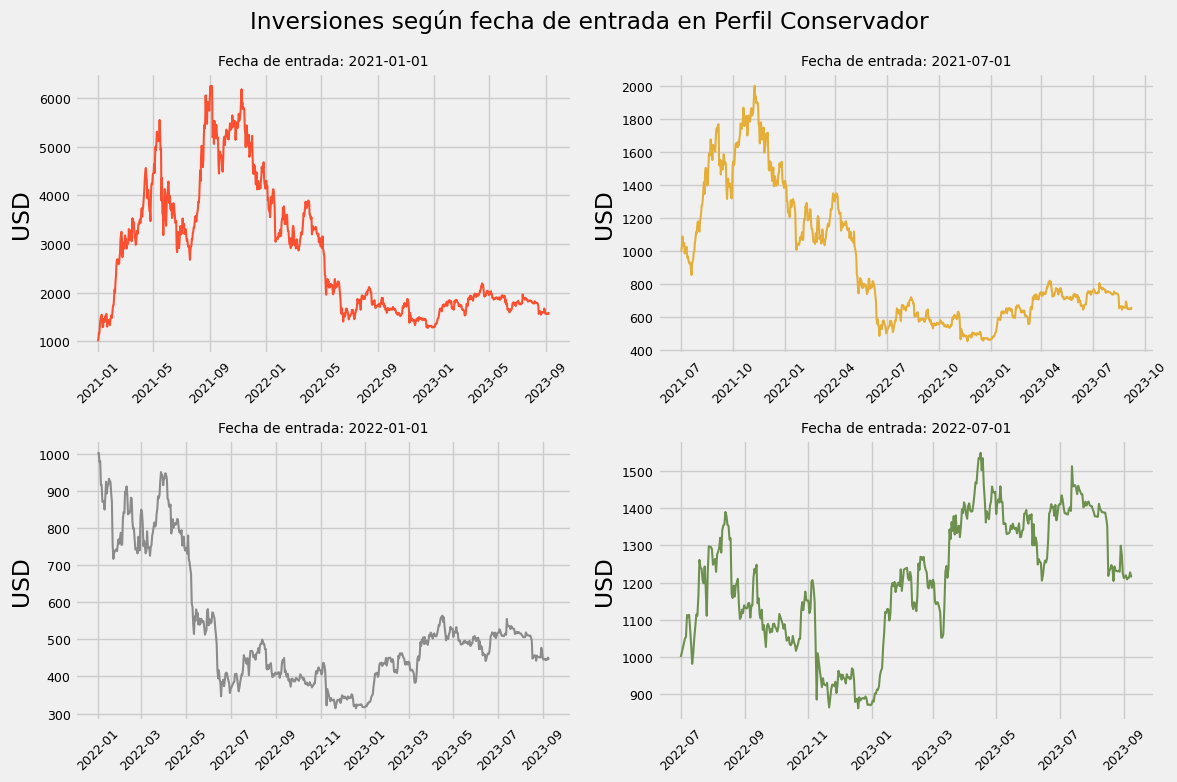

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

c = 1
for i, ent in enumerate(Entradas):
    c = c + i
    start_date = ent
    df_inversion2 = df[df.index >= start_date].copy()


    for cripto, pct in percentages.items():
        col_name = f"Inversion_{cripto}"
        df_inversion2.loc[:, col_name] = df_inversion2['price' + cripto] / df_inversion2['price' + cripto][0] * pct * 1000

    df_inversion2['Valor_Total_PConservador'] = df_inversion2[[f"Inversion_{cripto}" for cripto in percentages.keys()]].sum(axis=1)


    row, col = divmod(i, 2)
    ax = axs[row, col]


    ax.plot(df_inversion2.index, df_inversion2['Valor_Total_PConservador'], label=f'Fecha: {ent}', color=color_pal[c], linewidth=1.5)
    ax.set_title(f'Fecha de entrada: {ent}', fontsize=10)
    ax.set_ylabel('USD')
    ax.grid(True)
    ax.tick_params(axis='y', labelsize=9)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize = 9)
    if c == 4:
      c = 0


plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle("Inversiones según fecha de entrada en Perfil Conservador") #Investments according to entry date in the Conservative Profile.
plt.show()




# Perfil moderado. *Moderate profile.*

Composición de la cartera: 30% BTC, 15% ETH, 15% ADA, 10% DOT,

10% TRX, 10% SOL, 5% AVAX, 5% MATIC.

*Portfolio composition: 30% BTC, 15% ETH, 15% ADA, 10% DOT, 10% TRX, 10% SOL, 5% AVAX, 5% MATIC.*

In [ ]:
#seleccionamos las columnas del etf2:
ETF2 = df[['priceBTC', 'priceETH', 'priceADA', 'priceDOT', 'priceMATIC','priceSOL','priceTRX','priceAVAX']]

In [ ]:
# Definimos los porcentajes de inversión en un diccionario:
# We select the columns of ETF2:
percentages = {
    'BTC': 0.30,
    'ETH': 0.15,
    'ADA': 0.15,
    'DOT': 0.10,
    'TRX': 0.10,
    'SOL': 0.10,
    'AVAX':0.05,
    'MATIC':0.05
}


df_inversion = ETF2.copy()


for cripto, pct in percentages.items():
    col_name = f"Inversion_{cripto}"
    df_inversion.loc[:, col_name] = df_inversion['price' + cripto] / df_inversion['price' + cripto][0] * pct * 1000


df_inversion['Valor_Total_PModerado'] = df_inversion[[f"Inversion_{cripto}" for cripto in percentages.keys()]].sum(axis=1)


ETF2_1 = df_inversion

ETF2_1.head()

,priceBTC,priceETH,priceADA,priceDOT,priceMATIC,priceSOL,priceTRX,priceAVAX,Inversion_BTC,Inversion_ETH,Inversion_ADA,Inversion_DOT,Inversion_TRX,Inversion_SOL,Inversion_AVAX,Inversion_MATIC,Valor_Total_PModerado
2020-09-22,10551.0,346.52,0.08221,4.160,0.01962,2.911,0.02504,5.250,300.000000,150.000000,150.000000,100.000000,100.000000,100.000000,50.000000,50.000000,1000.000000
2020-09-23,10260.0,322.90,0.07744,4.010,0.01795,2.858,0.02495,3.525,291.725903,139.775482,141.296679,96.394231,99.640575,98.179320,33.571429,45.744139,946.327757
2020-09-24,10651.6,346.05,0.08305,4.374,0.01875,3.146,0.02589,4.590,302.860392,149.796549,151.532660,105.144231,103.394569,108.072827,43.714286,47.782875,1012.298388
2020-09-25,10752.9,357.35,0.09751,4.401,0.01925,3.197,0.02743,4.718,305.740688,154.688041,177.916312,105.793269,109.544728,109.824802,44.933333,49.057085,1057.498259
2020-09-26,10730.6,353.19,0.09473,4.322,0.01878,3.135,0.02745,4.529,305.106625,152.887279,172.843936,103.894231,109.624601,107.694950,43.133333,47.859327,1043.044283


### Visualización Rendimiento. Perfil Moderado. *Performance Visualization. Moderate Profile.*

In [ ]:
fig = px.line(ETF2_1, x = ETF2_1.index, y = ['Inversion_BTC', 'Inversion_ETH',
       'Inversion_ADA', 'Inversion_DOT', 'Inversion_TRX', 'Inversion_SOL',
       'Inversion_AVAX', 'Inversion_MATIC', 'Valor_Total_PModerado'], title='Perfil Moderado. Rendimiento total + rendimiento por cripto')

fig.update_xaxes(
    title_text="Fecha",
    tickformat="%Y-%m-%d",
    tickmode="auto",
    tickangle=45,
    showgrid=True,
)
fig.update_yaxes(title_text = 'USD')
fig.show()

# Perfil agresivo. *Aggressive profile.*

Composición de la cartera: 10% BTC, 10% ETH, 10% SOL, 10% ALGO,

10% TRX, 10% BNB, 10% AVAX, 10% MATIC, 10% XRP, 10% XTZ.

*Portfolio composition: 10% BTC, 10% ETH, 10% SOL, 10% ALGO, 10% TRX, 10% BNB, 10% AVAX, 10% MATIC, 10% XRP, 10% XTZ.*

In [ ]:
#seleccionamos las columnas del etf3:
# We select the columns of ETF3:
ETF3 = df[['priceBTC', 'priceETH', 'priceBNB', 'priceALGO', 'priceAVAX',
      'priceMATIC', 'priceTRX', 'priceXRP',
       'priceSOL', 'priceXTZ']]

In [ ]:

percentages = {
    'BTC': 0.10,
    'ETH': 0.10,
    'BNB': 0.10,
    'XRP': 0.10,
    'ALGO': 0.10,
    'SOL': 0.10,
    'AVAX':0.10,
    'MATIC':0.10,
    'TRX':0.10,
    'XTZ':0.10,
}


df_inversion = ETF3.copy()


for cripto, pct in percentages.items():
    col_name = f"Inversion_{cripto}"
    df_inversion.loc[:, col_name] = df_inversion['price' + cripto] / df_inversion['price' + cripto][0] * pct * 1000


df_inversion['Valor_Total_PAgresivo'] = df_inversion[[f"Inversion_{cripto}" for cripto in percentages.keys()]].sum(axis=1)


ETF3_1 = df_inversion

ETF3_1.head()

,priceBTC,priceETH,priceBNB,priceALGO,priceAVAX,priceMATIC,priceTRX,priceXRP,priceSOL,priceXTZ,...,Inversion_ETH,Inversion_BNB,Inversion_XRP,Inversion_ALGO,Inversion_SOL,Inversion_AVAX,Inversion_MATIC,Inversion_TRX,Inversion_XTZ,Valor_Total_PAgresivo
2020-09-22,10551.0,346.52,24.13,0.3072,5.250,0.01962,0.02504,0.2343,2.911,2.148,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1000.000000
2020-09-23,10260.0,322.90,23.10,0.2722,3.525,0.01795,0.02495,0.2246,2.858,1.995,...,93.183655,95.731455,95.860009,88.606771,98.179320,67.142857,91.488277,99.640575,92.877095,919.951980
2020-09-24,10651.6,346.05,24.15,0.2972,4.590,0.01875,0.02589,0.2324,3.146,2.139,...,99.864366,100.082884,99.189074,96.744792,108.072827,87.428571,95.565749,103.394569,99.581006,990.877302
2020-09-25,10752.9,357.35,24.83,0.3264,4.718,0.01925,0.02743,0.2441,3.197,2.269,...,103.125361,102.900953,104.182672,106.250000,109.824802,89.866667,98.114169,109.544728,105.633147,1031.356062
2020-09-26,10730.6,353.19,26.33,0.3228,4.529,0.01878,0.02745,0.2416,3.135,2.167,...,101.924853,109.117281,103.115664,105.078125,107.694950,86.266667,95.718654,109.624601,100.884544,1021.127547


### Visualización Rendimiento. Perfil Agresivo. *Performance Visualization. Aggressive Profile.*

In [ ]:
fig = px.line(ETF3_1, x = ETF3_1.index, y = ['Inversion_BTC', 'Inversion_ETH', 'Inversion_BNB', 'Inversion_XRP',
       'Inversion_ALGO', 'Inversion_SOL', 'Inversion_AVAX', 'Inversion_MATIC',
       'Inversion_TRX', 'Inversion_XTZ', 'Valor_Total_PAgresivo'],
              title='Perfil Agresivo. Rendimiento total + rendimiento por cripto')

fig.update_xaxes(
    title_text="Fecha",
    tickformat="%Y-%m-%d",
    tickmode="auto",
    tickangle=45,
    showgrid=True,
)
fig.update_yaxes(title_text = 'USD')
fig.show()

# Comparativa de inversiones. *Investment Comparison.*

In [ ]:
ETF1_1 = ETF1_1['Valor_Total_PConservador']
ETF2_1 = ETF2_1['Valor_Total_PModerado']
ETF3_1 = ETF3_1['Valor_Total_PAgresivo']


In [ ]:
ETFcomparativo = pd.concat([ETF1_1,ETF2_1, ETF3_1], axis=1)

In [ ]:
ETFcomparativo.rename(columns={'Valor_Total_PConservador':'Conservador','Valor_Total_PModerado':'Moderado',
                       'Valor_Total_PAgresivo':'Agresivo'}, inplace=True)

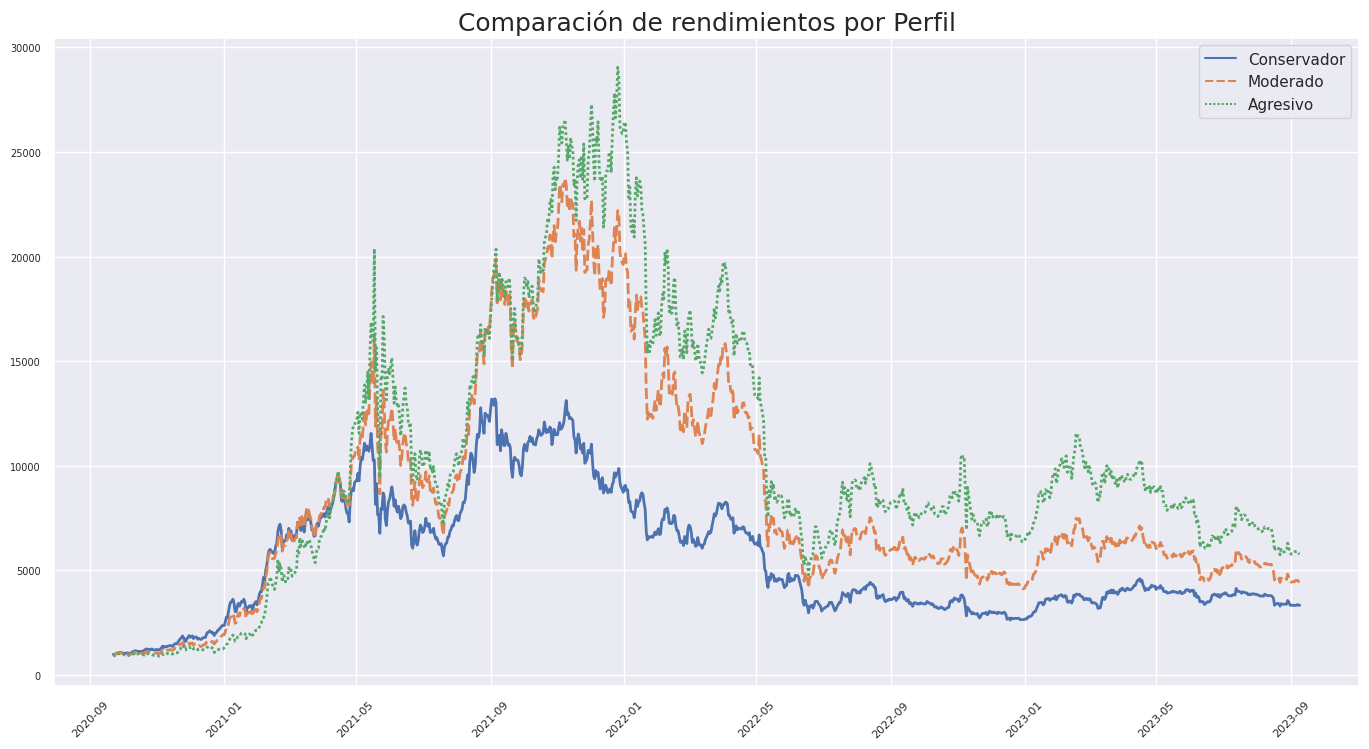

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(ETFcomparativo, linewidth=2)
plt.xticks(fontsize=8, rotation=45)
plt.title("Comparación de rendimientos por Perfil", fontsize=18) #Comparison of Returns by Profile.
plt.tick_params(axis='y', labelsize=7)
plt.show()

# Exportamos el dataset de perfiles de inversor

Exportamos el dataset de perfiles de inversor para predecir proximos rendimientos en el siguiente proyecto:

In [ ]:
from google.colab import files

df.to_csv('PerfilesDeInversorCrypto.csv')